In [1]:
import os
import numpy as np
np.random.seed(69)
import pandas as pd
import random
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
sns.set()
import tensorflow as tf
from tqdm.notebook import tqdm
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,concatenate, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, ZeroPadding2D, LeakyReLU, ReLU, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import time

In [2]:
def get_metrics(y_pred, y_test, labels, to_print=True):
    correct_labels = np.where(y_pred==y_test)[0]
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred,average='macro')
    recall = metrics.recall_score(y_test, y_pred,average='macro')
    f1score = metrics.f1_score(y_test, y_pred,average='macro')
    # rocscore = metrics.roc_auc_score(y_test, y_pred,average='micro',multi_class="ovo")
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)  
    classification_report = metrics.classification_report(y_test, y_pred)

    if to_print:
        print("Identified {} correct labels out of {} labels".format(len(correct_labels), y_test.shape[0]))
        print("Accuracy:",accuracy)
        print("Precision:",precision)
        print("Recall:",recall)
        print("F1 Score:",f1score)
        # print("ROC AUC Score:",rocscore)
        print(f"Labels are: {labels}")
        print("Confusion Matrix:\n", confusion_matrix)
        print("Classification_Report:\n", classification_report)

    return (correct_labels, accuracy, precision, recall, confusion_matrix, classification_report)

In [3]:
dnnx_sgq = np.load("../dataset/dnnx_sgq.npy")
X_sgq = np.load("../dataset/X_sgq.npy")
y_sgq = np.load("../dataset/y_sgq.npy")

In [4]:
sgqcnn = load_model("../../Experiment 1/Star-Galaxy-QSO/output/CNNClassifier.h5")
sgqdnn = load_model("../../Experiment 1/Star-Galaxy-QSO/output/DNNClassifier.h5")
sgqensemble = load_model("../../Experiment 1/Star-Galaxy-QSO/output/EnsembleClassifier.h5")

In [5]:
def print_preds(model, inp, y, mode):
    preds = model.predict(inp)
    if mode == "sg":
        lab = ['GALAXY', 'STAR']
    elif mode=="sgq":
        lab = ['GALAXY', 'QSO', 'STAR']
    
    print(get_metrics(preds.argmax(axis=1), y.argmax(axis=1),labels=lab))

# Star-Galaxy-QSO

In [6]:
print("DNN")
print_preds(sgqdnn, dnnx_sgq, y_sgq, mode="sgq")

892/892 [==============================] - 3s 3ms/step
Identified 20844 correct labels out of 28532 labels
Accuracy: 0.7305481564559092
Precision: 0.7632056447044034
Recall: 0.7305437027312776
F1 Score: 0.7266103079308271
Labels are: ['GALAXY', 'QSO', 'STAR']
Confusion Matrix:
 [[9104  353   54]
 [3537 5739  234]
 [1029 2481 6001]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.67      0.96      0.79      9511
           1       0.67      0.60      0.63      9510
           2       0.95      0.63      0.76      9511

    accuracy                           0.73     28532
   macro avg       0.76      0.73      0.73     28532
weighted avg       0.76      0.73      0.73     28532

(array([    0,     1,     2, ..., 28522, 28524, 28526]), 0.7305481564559092, 0.7632056447044034, 0.7305437027312776, array([[9104,  353,   54],
       [3537, 5739,  234],
       [1029, 2481, 6001]]), '              precision    recall  f1-score   support\n\n   

In [7]:
print("CNN")
print_preds(sgqcnn, X_sgq, y_sgq, mode="sgq")

CNN
892/892 [==============================] - 206s 231ms/step
Identified 19812 correct labels out of 28532 labels
Accuracy: 0.6943782419739241
Precision: 0.7388082659734255
Recall: 0.6943750706424642
F1 Score: 0.6878229927231948
Labels are: ['GALAXY', 'QSO', 'STAR']
Confusion Matrix:
 [[8955  438  118]
 [3513 5743  254]
 [1875 2522 5114]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.62      0.94      0.75      9511
           1       0.66      0.60      0.63      9510
           2       0.93      0.54      0.68      9511

    accuracy                           0.69     28532
   macro avg       0.74      0.69      0.69     28532
weighted avg       0.74      0.69      0.69     28532

(array([    1,     2,     3, ..., 28513, 28522, 28524]), 0.6943782419739241, 0.7388082659734255, 0.6943750706424642, array([[8955,  438,  118],
       [3513, 5743,  254],
       [1875, 2522, 5114]]), '              precision    recall  f1-score   suppor

In [8]:
print("Ensemble")
print_preds(sgqensemble, [X_sgq, dnnx_sgq], y_sgq, mode="sgq")

Ensemble
892/892 [==============================] - 139s 155ms/step
Identified 20929 correct labels out of 28532 labels
Accuracy: 0.7335272676293285
Precision: 0.765392689360764
Recall: 0.7335222267219653
F1 Score: 0.7292032470010293
Labels are: ['GALAXY', 'QSO', 'STAR']
Confusion Matrix:
 [[9170  288   53]
 [3616 5608  286]
 [1112 2248 6151]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.66      0.96      0.78      9511
           1       0.69      0.59      0.64      9510
           2       0.95      0.65      0.77      9511

    accuracy                           0.73     28532
   macro avg       0.77      0.73      0.73     28532
weighted avg       0.77      0.73      0.73     28532

(array([    0,     1,     2, ..., 28509, 28522, 28524]), 0.7335272676293285, 0.765392689360764, 0.7335222267219653, array([[9170,  288,   53],
       [3616, 5608,  286],
       [1112, 2248, 6151]]), '              precision    recall  f1-score   sup

892/892 [==============================] - 134s 150ms/step


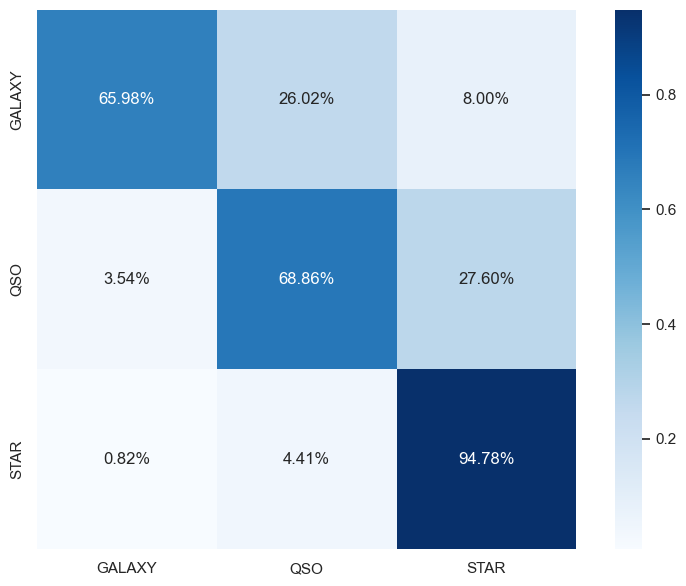

In [9]:
cm = metrics.confusion_matrix(sgqensemble.predict([X_sgq, dnnx_sgq]).argmax(axis=1),
                              y_sgq.argmax(axis=1),
                              normalize='true')
df_cm = pd.DataFrame(cm, index = ['GALAXY', 'QSO', 'STAR'],columns = ['GALAXY', 'QSO', 'STAR'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,cmap="Blues",square=True,fmt='.2%')
plt.savefig("output/ensemble_cm_sgq.pdf")